In [6]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar y preparar los datos (Dataset Iris)
iris = load_iris()
X = iris.data
y_true = iris.target # Se usa solo para comparar, no en el clustering

# Escalar los datos: K-Means es sensible a la escala de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dimensiones originales de los datos (Iris):", X_scaled.shape)

Dimensiones originales de los datos (Iris): (150, 4)


Dimensiones después de PCA: (150, 2)


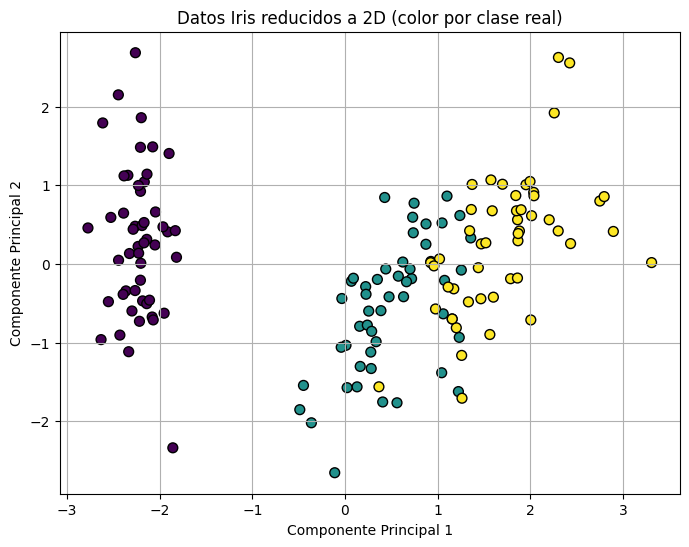

In [7]:
# Aplicar PCA para reducir la dimensionalidad de 4 a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Dimensiones después de PCA:", X_pca.shape)

# Visualización de los datos reducidos (opcional)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', edgecolor='k', s=50)
plt.title('Datos Iris reducidos a 2D (color por clase real)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [8]:
# Probar K-Means con diferentes valores de k

k_values = [2, 4, 5]
silhouette_scores_iris = {}

print("\n--- Resultados (Dataset Iris) ---")

for k in k_values:
    # Inicializar y entrenar el modelo K-Means
    # n_init=10 para evitar óptimos locales
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Predecir clusters usando los datos reducidos por PCA
    labels = kmeans.fit_predict(X_pca)

    # Calcular el Silhouette Score para evaluar la calidad del clustering
    score = silhouette_score(X_pca, labels)
    silhouette_scores_iris[k] = score

    print(f"Para K = {k}, el Silhouette Score es: {score:.4f}")

# Conclusión sobre el Dataset Iris
# El Silhouette Score varía de -1 a +1.
# +1: clusters bien definidos y separados.
# 0: clusters superpuestos.
# -1: asignación incorrecta de puntos a clusters.

best_k_iris = max(silhouette_scores_iris, key=silhouette_scores_iris.get)
print(f"\nConclusión (Iris): El k más adecuado es {best_k_iris} con un score de {silhouette_scores_iris[best_k_iris]:.4f}")


--- Resultados (Dataset Iris) ---
Para K = 2, el Silhouette Score es: 0.6145
Para K = 4, el Silhouette Score es: 0.4409
Para K = 5, el Silhouette Score es: 0.4156

Conclusión (Iris): El k más adecuado es 2 con un score de 0.6145


In [9]:
# Cargar y preparar los datos (Dataset Wine)
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = wine.data
y_wine_true = wine.target # Solo para referencia

# Escalar los datos del dataset Wine
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

print("\nDimensiones originales de los datos (Wine):", X_wine_scaled.shape)

# Aplicar PCA al dataset Wine para reducción de dimensionalidad
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

print("Dimensiones después de PCA (Wine):", X_wine_pca.shape)


Dimensiones originales de los datos (Wine): (178, 13)
Dimensiones después de PCA (Wine): (178, 2)


In [10]:
# Probar K-Means con diferentes valores de k para el Dataset Wine

k_values = [2, 4, 5]
silhouette_scores_wine = {}

print("\n--- Resultados (Dataset Wine) ---")

for k in k_values:
    # Inicializar y entrenar el modelo K-Means
    kmeans_wine = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_wine = kmeans_wine.fit_predict(X_wine_pca)

    # Calcular el Silhouette Score
    score_wine = silhouette_score(X_wine_pca, labels_wine)
    silhouette_scores_wine[k] = score_wine

    print(f"Para K = {k}, el Silhouette Score es: {score_wine:.4f}")

# Conclusión sobre el Dataset Wine
best_k_wine = max(silhouette_scores_wine, key=silhouette_scores_wine.get)
print(f"\nConclusión (Wine): El k más adecuado es {best_k_wine} con un score de {silhouette_scores_wine[best_k_wine]:.4f}")


--- Resultados (Dataset Wine) ---
Para K = 2, el Silhouette Score es: 0.4649
Para K = 4, el Silhouette Score es: 0.4914
Para K = 5, el Silhouette Score es: 0.4391

Conclusión (Wine): El k más adecuado es 4 con un score de 0.4914
